# Regresión Logística

__Rosas Avila José Daniel__

Notebook creado para la simulación de la ecuación logística

$$
\frac{dy(t)}{dt} = \lambda y(1-y), \quad para \quad 0 < t < T_{max}
$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def mesh (a, b, Nt ):
    ht = (b-a) / Nt
    return ht
def exactSolution (t, y0 , lam ):
    return y0 /(y0+(1-y0)*np.exp(-lam*t))

def forwardEuler (y, ht , lam ):

    for i, val in enumerate (y [0: -1]):
        y[i +1] =  y[i]*(1+(lam*ht*(1-y[i]))) 

    return y



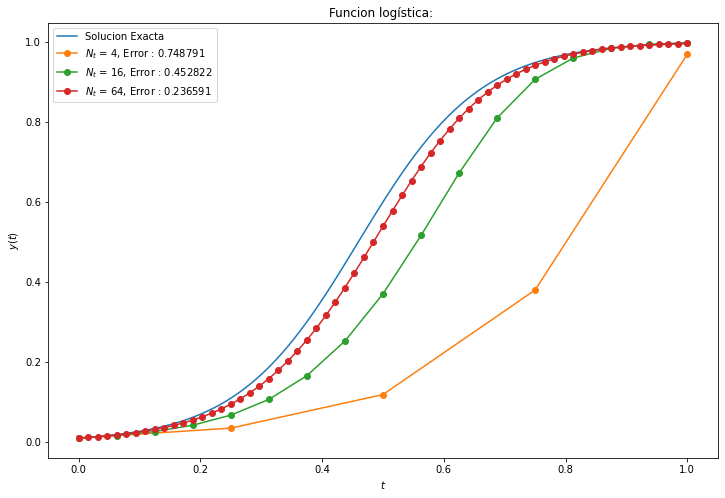

In [60]:
Tmax = 1 #Tiempo maximo
y0 = 0.01 #valor inicial
lam = 10 #valor de lambda
tl = np. linspace (0, Tmax , 100)
y_exacta = exactSolution (tl , y0 , lam ) #solucion exacta con mushos puntos
plt.figure(figsize=(12,8))
plt.plot(tl,y_exacta,label='Solucion Exacta')

Nt_array = np.array([4,16,64])
for Nt in Nt_array:
    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    t = np. linspace (0, Tmax , Nt +1) #Vector de tiempo 
    yf = np. zeros (Nt +1) #vector auxiliar para forward euler
    yf [0] = y0 # condicion inicial
    yf = forwardEuler (yf , ht , lam )
    y_exac_p = exactSolution (t, y0 , lam) # solucion exacta con puntos igual a los definidos
    error_f = np. linalg . norm (yf - y_exac_p ,2)
#     print(error_f)
    plt.plot(t,yf,'o-',label='$N_t$ = {}, Error : {:5f}'.format(Nt,error_f))
plt.legend();
plt.title('Funcion logística: ')
plt.xlabel('$t$');
plt.ylabel('$y(t)$');